<a href="https://colab.research.google.com/github/Marimango06/Laboratorio2_se-ales/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO 2

In [ ]:
!pip install librosa
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install IPython
!pip install scikit-learn
!pip install soundfile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


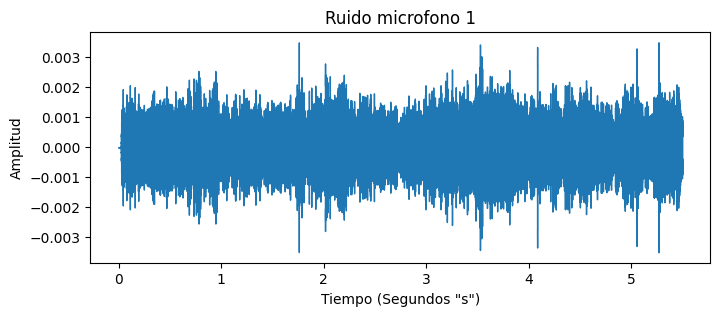

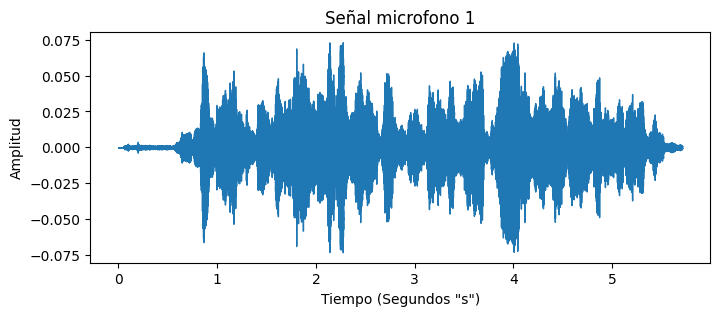

La relacion señal-ruido sera en el celular de Daniela es:12.313324237380316


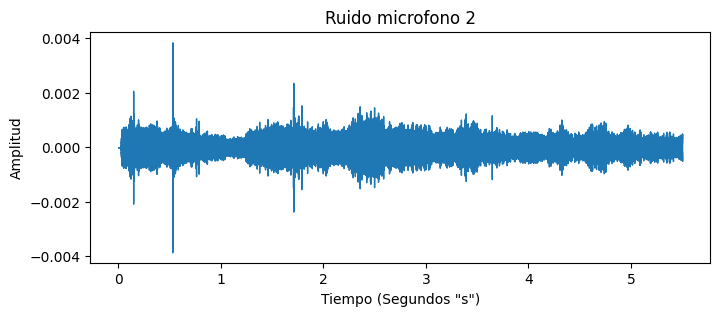

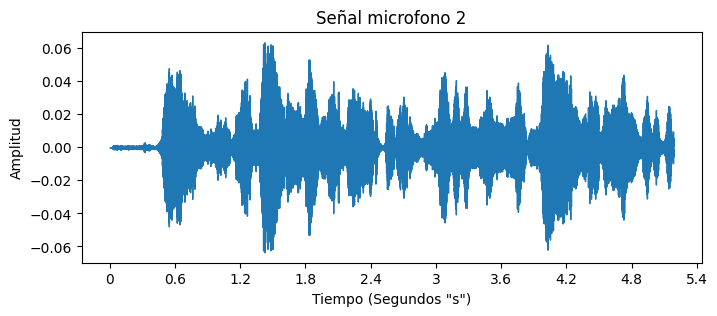

La relacion señal-ruido sera en el celular de Maria es:12.512404492846995


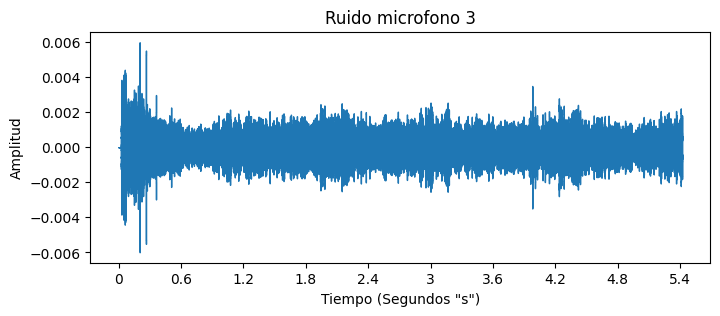

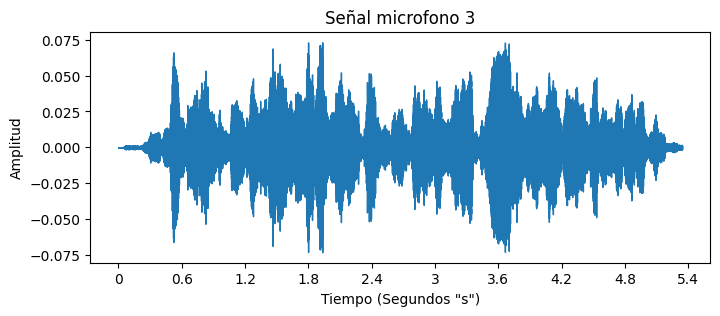

La relacion señal-ruido sera en el celular de Natalia es:14.80588586159625


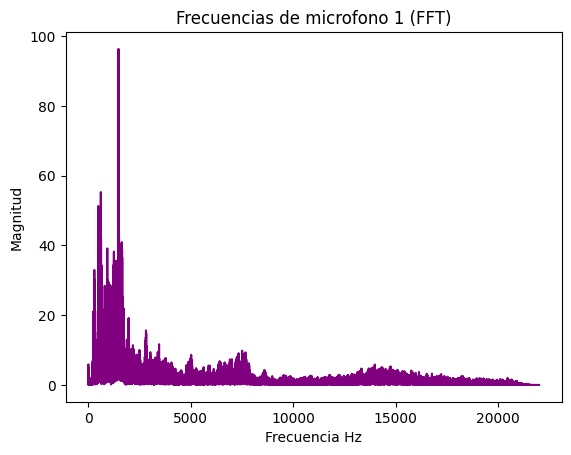

la magnitud es: [4.6507378e+00 4.5837104e-02 4.3477207e-01 ... 9.4385163e-05 9.3347044e-05
 9.4727475e-05]
el fase es: [-180.        163.80415   110.72675  ...   17.367487 -110.72675
 -163.80415 ]


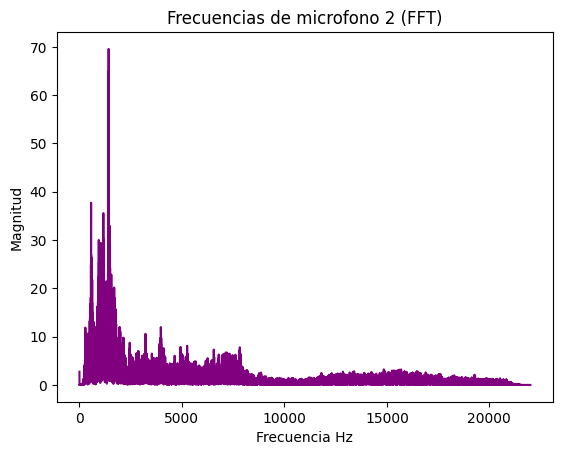

la magnitud es: [2.7330675e+00 1.2243521e-02 2.4462517e-02 ... 9.4473353e-06 1.0252173e-05
 9.3305553e-06]
el fase es: [-180.       -76.00609 -179.66158 ... -101.40507  179.66158   76.00609]


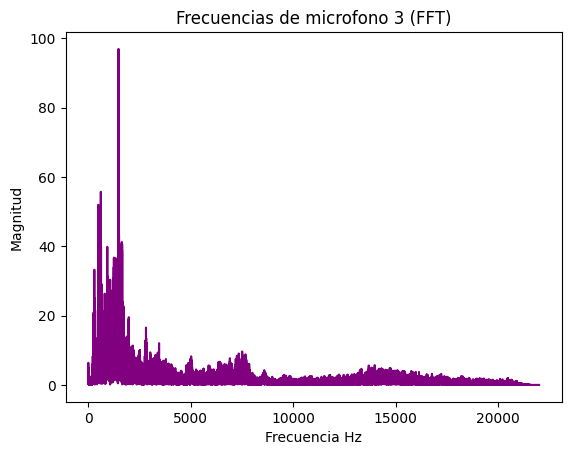

la magnitud es: [4.7257247e+00 1.9071564e-01 3.3518577e-01 ... 1.6438961e-04 1.6415742e-04
 1.6138761e-04]
el fase es: [-180.         -3.307002   54.647175 ...   68.99505   -54.647175
    3.307002]


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


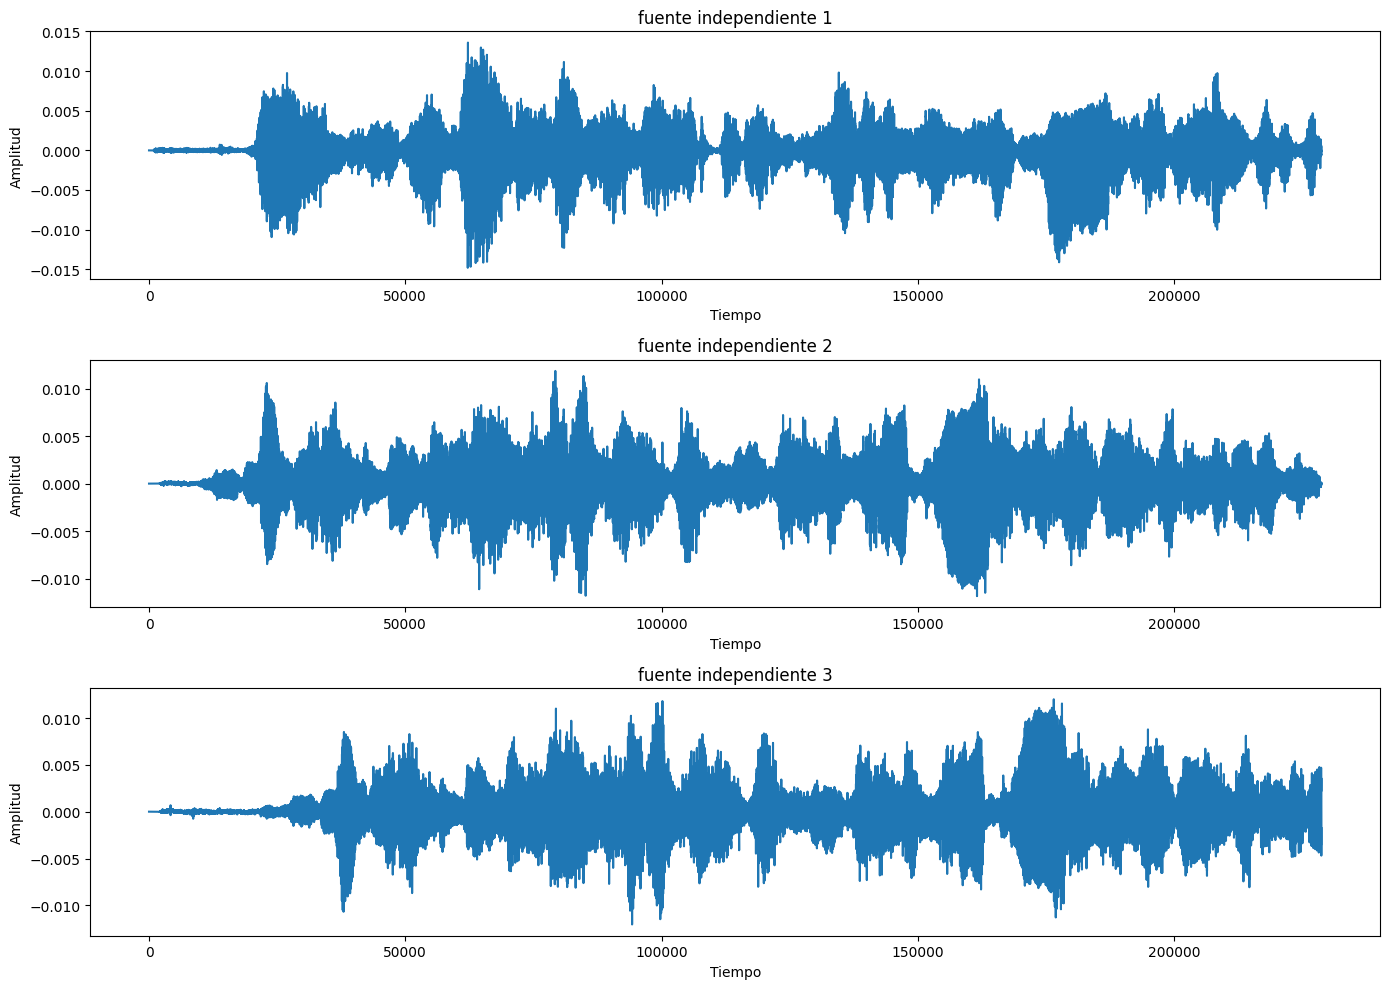

La relacion señal-ruido sera:74.97268226142617
La relacion señal-ruido sera:74.97268226142617
La relacion señal-ruido sera:74.97268226142617


In [9]:
import librosa
import scipy.signal
import sklearn
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import IPython.display as ipd
import scipy.fftpack as fourier
import soundfile as sf
from sklearn.decomposition import FastICA
from google.colab import drive

##subida de las señales de audio
drive.mount('/content/drive') #archivos en drive
ruido_ambiente_Dani, sr1= librosa.load ('/content/drive/My Drive/Señales/Lab 2/ambiente_audio_Dani (mp3cut.net).mp3')#ruido celular Daniela
ruido_ambiente_maria, sr2= librosa.load('/content/drive/My Drive/Señales/Lab 2/ambiente_audio_maria (mp3cut.net).mp3')#ruido celular Maria
ruido_ambiente_nata, sr3= librosa.load('/content/drive/My Drive/Señales/Lab 2/ambiente_audio_nata (mp3cut.net).mp3')#ruido celular Natalia

audio_mari_dani, sr4= librosa.load('/content/drive/My Drive/Señales/Lab 2/audio_mari_dani_(mp3cut.net).mp3')#audio celular Daniela
audio_mari_maria, sr5= librosa.load('/content/drive/My Drive/Señales/Lab 2/audio_mariana_Maria_(mp3cut.net).mp3')#audio celular Maria
audio_mari_nata, sr6= librosa.load('/content/drive/My Drive/Señales/Lab 2/audio_mariana_nata_(mp3cut.net).mp3')#audio celular Natalia

## grafica de los sonidos
#Ruido Microfono 1
plt.figure(figsize=(8, 3))
librosa.display.waveshow(ruido_ambiente_Dani, sr=sr1)
plt.xlabel('Tiempo (Segundos "s")')
plt.ylabel('Amplitud')
plt.title('Ruido microfono 1')
plt.show()
#Señal Microfono 1
plt.figure(figsize=(8, 3))
librosa.display.waveshow(audio_mari_dani, sr=sr4)
plt.xlabel('Tiempo (Segundos "s")')
plt.ylabel('Amplitud')
plt.title('Señal microfono 1')
plt.show()
#CALCULAR SNR DE CADA AUDIO
#MICROFONO 1 (celular Daniela)
valores1 = (audio_mari_dani)
valores=(ruido_ambiente_Dani)
tamano=len(ruido_ambiente_Dani)
tamano1=len(audio_mari_dani)
media_ruido = (np.sum(valores)/tamano)
valores_cuadrados = valores1**2
potencia_señal = (valores_cuadrados.sum()/tamano1)
SNR= 10*np.log(potencia_señal/abs(media_ruido))
print(f"La relacion señal-ruido sera en el celular de Daniela es:{SNR}")
#MICROFONO 2
#Ruido microfono 2
plt.figure(figsize=(8, 3))
librosa.display.waveshow(ruido_ambiente_maria, sr=sr2)
plt.xlabel('Tiempo (Segundos "s")')
plt.ylabel('Amplitud')
plt.title('Ruido microfono 2')
plt.show()
#Señal microfono 2
plt.figure(figsize=(8, 3))
librosa.display.waveshow(audio_mari_maria, sr=sr5)
plt.xlabel('Tiempo (Segundos "s")')
plt.ylabel('Amplitud')
plt.title('Señal microfono 2')
plt.show()
#Calcular SNR microfono 2
valores1 = (audio_mari_maria)
valores=(ruido_ambiente_maria)
tamano=len(ruido_ambiente_maria)
tamano1=len(audio_mari_maria)
media_ruido = (np.sum(valores)/tamano)
valores_cuadrados = valores1**2
potencia_señal = (valores_cuadrados.sum()/tamano1)
SNR= 10*np.log(potencia_señal/abs(media_ruido))
print(f"La relacion señal-ruido sera en el celular de Maria es:{SNR}")

#MICROFONO 3
#Ruido microfono 3
plt.figure(figsize=(8, 3))
librosa.display.waveshow(ruido_ambiente_nata, sr=sr3)
plt.xlabel('Tiempo (Segundos "s")')
plt.ylabel('Amplitud')
plt.title('Ruido microfono 3')
plt.show()
#Señal micrifono 3
plt.figure(figsize=(8, 3))
librosa.display.waveshow(audio_mari_nata, sr=sr6)
plt.xlabel('Tiempo (Segundos "s")')
plt.ylabel('Amplitud')
plt.title('Señal microfono 3')
plt.show()
#Calcular SNR microfono 3
valores1 = (audio_mari_nata)
valores=(ruido_ambiente_nata)
tamano=len(ruido_ambiente_nata)
tamano1=len(audio_mari_nata)
media_ruido = (np.sum(valores)/tamano)
valores_cuadrados = valores1**2
potencia_señal = (valores_cuadrados.sum()/tamano1)
SNR= 10*np.log(potencia_señal/abs(media_ruido))
print(f"La relacion señal-ruido sera en el celular de Natalia es:{SNR}")

#aplicacion de transformada rapida de Fourier
#Microfono 1
gn= audio_mari_nata
L=len(gn)#longitud de la señal
Fs=44000 #frecuencia de muestreo
n=np.arange(0,L)/Fs #vector de tiempo

gk=fourier.fft(gn) #aplicacion transformada rapida de fourier
M1_gk=np.abs(gk) #magnitud
M1_gk=M1_gk[0:L//2]#mitad de la magnitud

Ph_gk=np.angle(gk)#
F= Fs*np.arange(0,L//2)/L #vector de frecuencias

plt.plot (F, M1_gk, color='purple')
plt.title('Frecuencias de microfono 1 (FFT)')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Magnitud')

plt.show()

print(f"la magnitud es: {M1_gk}")
print (f"el fase es: {Ph_gk*180/np.pi}")
#microfono 2
gn= audio_mari_maria
L=len(gn)#longitud de la señal
Fs=44000 #frecuencia de muestreo
n=np.arange(0,L)/Fs #vector de tiempo

gk=fourier.fft(gn) #aplicacion transformada rapida de fourier
M1_gk=np.abs(gk) #magnitud
M1_gk=M1_gk[0:L//2]#mitad de la magnitud

Ph_gk=np.angle(gk)#
F= Fs*np.arange(0,L//2)/L #vector de frecuencias

plt.plot (F, M1_gk, color='purple')
plt.title('Frecuencias de microfono 2 (FFT)')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Magnitud')
plt.show()

print(f"la magnitud es: {M1_gk}")
print (f"el fase es: {Ph_gk*180/np.pi}")
#Microfono 3
gn= audio_mari_dani
L=len(gn)#longitud de la señal
Fs=44000 #frecuencia de muestreo
n=np.arange(0,L)/Fs #vector de tiempo

gk=fourier.fft(gn) #aplicacion transformada rapida de fourier
M1_gk=np.abs(gk) #magnitud
M1_gk=M1_gk[0:L//2]#mitad de la magnitud

Ph_gk=np.angle(gk)#
F= Fs*np.arange(0,L//2)/L #vector de frecuencias

plt.plot (F, M1_gk, color='purple')
plt.title('Frecuencias de microfono 3 (FFT)')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Magnitud')
plt.show()

print(f"la magnitud es: {M1_gk}")
print (f"el fase es: {Ph_gk*180/np.pi}")

#misma longitudfile_path = ["audio_mari_dani", "audio_mari_maria", "audio_mari_nata", "ambiente_audio_Dani", "ambiente_audio_maria", "ambiente_audio_nata"]
file_paths = ["/content/drive/My Drive/Señales/Lab 2/audio_mari_dani_(mp3cut.net).mp3",
             "/content/drive/My Drive/Señales/Lab 2/audio_mariana_Maria_(mp3cut.net).mp3",
             "/content/drive/My Drive/Señales/Lab 2/audio_mariana_nata_(mp3cut.net).mp3",
             "/content/drive/My Drive/Señales/Lab 2/ambiente_audio_Dani (mp3cut.net).mp3",
             "/content/drive/My Drive/Señales/Lab 2/ambiente_audio_maria (mp3cut.net).mp3",
             "/content/drive/My Drive/Señales/Lab 2/ambiente_audio_nata (mp3cut.net).mp3"]

audios = [librosa.load(fp,sr= None) for fp in file_paths]

min_length = min(len(y) for y, _ in audios[:-1])
señales= np.vstack([y[:min_length] for y, _ in audios[:-1]]).T


#Ánalisis de Componentes Independientes
ica = FastICA(n_components=3)
fuentes = ica.fit_transform(señales)

#Graficar
plt.figure(figsize=(14, 10))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(fuentes[:,i])
    plt.title(f'fuente independiente {i + 1}')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

#Guardar fuentes independientes
fuentes_normalizadas = fuentes / np.max(np.abs(fuentes), axis=0)
sr_original= 44100
for i in range (3):
    sf.write(f'fuente_independiente{i + 1}.mp3', fuentes_normalizadas[:, i], sr_original)
    valores1 = (fuentes_normalizadas)
    valores=(ruido_ambiente_Dani)
    tamano=len(ruido_ambiente_Dani)
    tamano1=len(fuentes_normalizadas)
    media_ruido = (np.sum(valores)/tamano)
    valores_cuadrados = valores1**2
    potencia_señal = (valores_cuadrados.sum()/tamano1)
    SNR= 10*np.log(potencia_señal/abs(media_ruido))
    print(f"La relacion señal-ruido sera:{SNR}")